<a href="https://colab.research.google.com/github/Noman-494/Gen-AI/blob/main/Customerchurn_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
df.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
df.Gender.value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [14]:
X=df.drop('Exited',axis=1)
y=df['Exited'].values

In [15]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [24]:
model=Sequential()
model.add(Dense(units=6,activation='sigmoid',input_dim=11))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155 (620.00 B)

 Trainable params: 155 (620.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
X_train.shape

(8000, 11)

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7947 - loss: 0.5525 - val_accuracy: 0.8035 - val_loss: 0.4733
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7869 - loss: 0.4914 - val_accuracy: 0.8035 - val_loss: 0.4355
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7950 - loss: 0.4509 - val_accuracy: 0.8210 - val_loss: 0.4097
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8207 - loss: 0.4141 - val_accuracy: 0.8290 - val_loss: 0.4013
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.4162 - val_accuracy: 0.8315 - val_loss: 0.4015
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8278 - loss: 0.4172 - val_accuracy: 0.8325 - val_loss: 0.3927
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8361 - loss: 0.4009 - val_accuracy: 0.8340 - val_loss: 0.3894
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8345 - loss: 0.3982 - val_accu

In [28]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8622 - loss: 0.3360


[0.33490708470344543, 0.8644999861717224]

In [29]:
model.layers[0].get_weights()

[array([[-0.11073219, -0.02234381,  0.14079104, -0.23411393, -0.11038716,
          0.10854401],
        [ 1.4816806 ,  0.24705237, -0.24763407, -0.67148733,  0.0814078 ,
         -0.8601138 ],
        [ 0.04721753,  0.0423243 ,  0.04695911, -0.09709379,  0.03433967,
          0.03089529],
        [-0.5967822 ,  0.5248021 ,  0.3124332 ,  0.21535507, -0.55968755,
         -0.3450983 ],
        [-0.69298244,  2.4219055 ,  0.86224544,  0.6804157 , -0.41994703,
         -0.8440523 ],
        [ 0.20937987,  0.0089382 ,  0.1951502 , -0.1440755 ,  0.1491742 ,
          0.17374228],
        [ 0.56609833,  0.25977778, -0.14228271, -0.6046654 ,  1.015579  ,
         -0.13427462],
        [ 0.10982537,  0.02434526, -0.2886684 , -0.0130644 , -0.45679942,
         -0.10846365],
        [ 0.27383587, -0.27306587,  0.13262825, -0.5942957 , -0.5725039 ,
          0.13502194],
        [ 0.13159463,  0.13154791,  0.28163147, -0.32531437, -0.2822959 ,
          0.11338414],
        [-0.19315551, -0.09411

In [33]:
model.layers[1].get_weights()

[array([[-0.33998445, -0.51205945,  0.4000438 ,  0.06053328, -0.49315268,
          0.17700367],
        [-0.04820132,  0.7314061 ,  0.13341439,  0.9163192 ,  0.44996744,
         -0.8106225 ],
        [-0.19467711, -0.70471597, -0.26540634,  0.12052783, -0.57910854,
          0.6162566 ],
        [-0.60287136,  0.13469078, -1.1859205 , -0.8377587 ,  0.40800086,
          0.8425357 ],
        [ 0.22939533,  0.64831376,  0.49413446,  0.16310404,  0.56395924,
          0.89292234],
        [-0.04107714,  1.1823931 , -1.1285069 ,  0.13374425,  0.54937977,
         -0.47327423]], dtype=float32),
 array([ 0.        , -0.10621026,  0.15238908, -0.24542587, -0.08927488,
         0.44414684], dtype=float32)]

In [35]:
y_predict=np.where((model.predict(X_test)) > 0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [36]:
y_predict

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
accuracy_score(y_test,y_predict)

0.8645

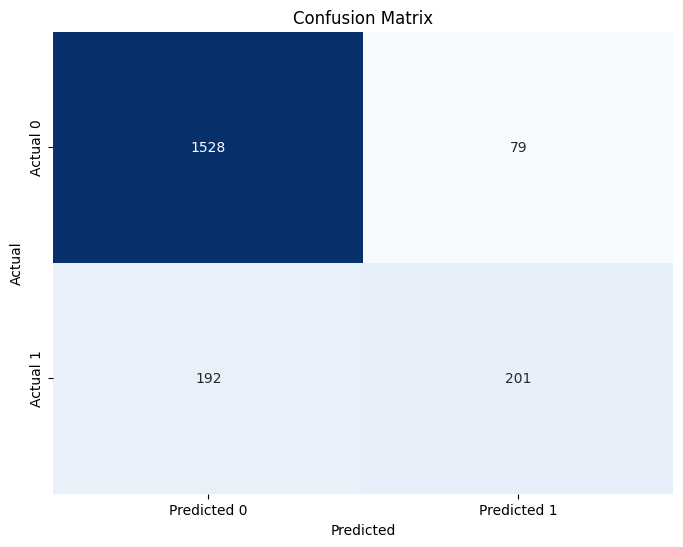

In [41]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

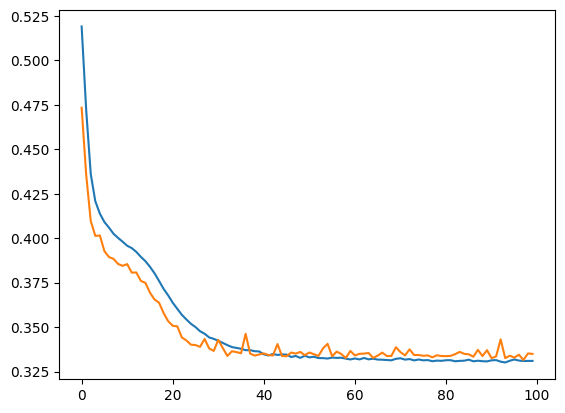

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

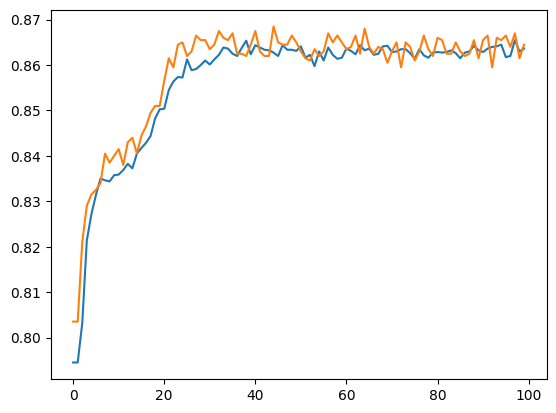

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])